In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook, tqdm

df = pd.read_csv('Trend_data.csv')

In [23]:
# 중복 값 제거 된 데이터
df.head()

,video_id,title,published_at,channel_title,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,False,False,Entertainment
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,False,False,Film & Animation
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,False,False,People & Blogs
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,False,False,Entertainment
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,False,False,Music


In [24]:
# 카테고리별 trend 횟수
trending_count = df.groupby('category')[['trending_date']].count().reset_index()
trending_count.sort_values(by='trending_date', ascending=False, inplace=True)

trending_count

,category,trending_date
3,Entertainment,63956
9,People & Blogs,29974
7,Music,20758
12,Sports,13863
1,Comedy,11782
8,News & Politics,8204
6,Howto & Style,7947
5,Gaming,6986
4,Film & Animation,5374
13,Travel & Events,4002


<AxesSubplot:xlabel='trending_date', ylabel='category'>

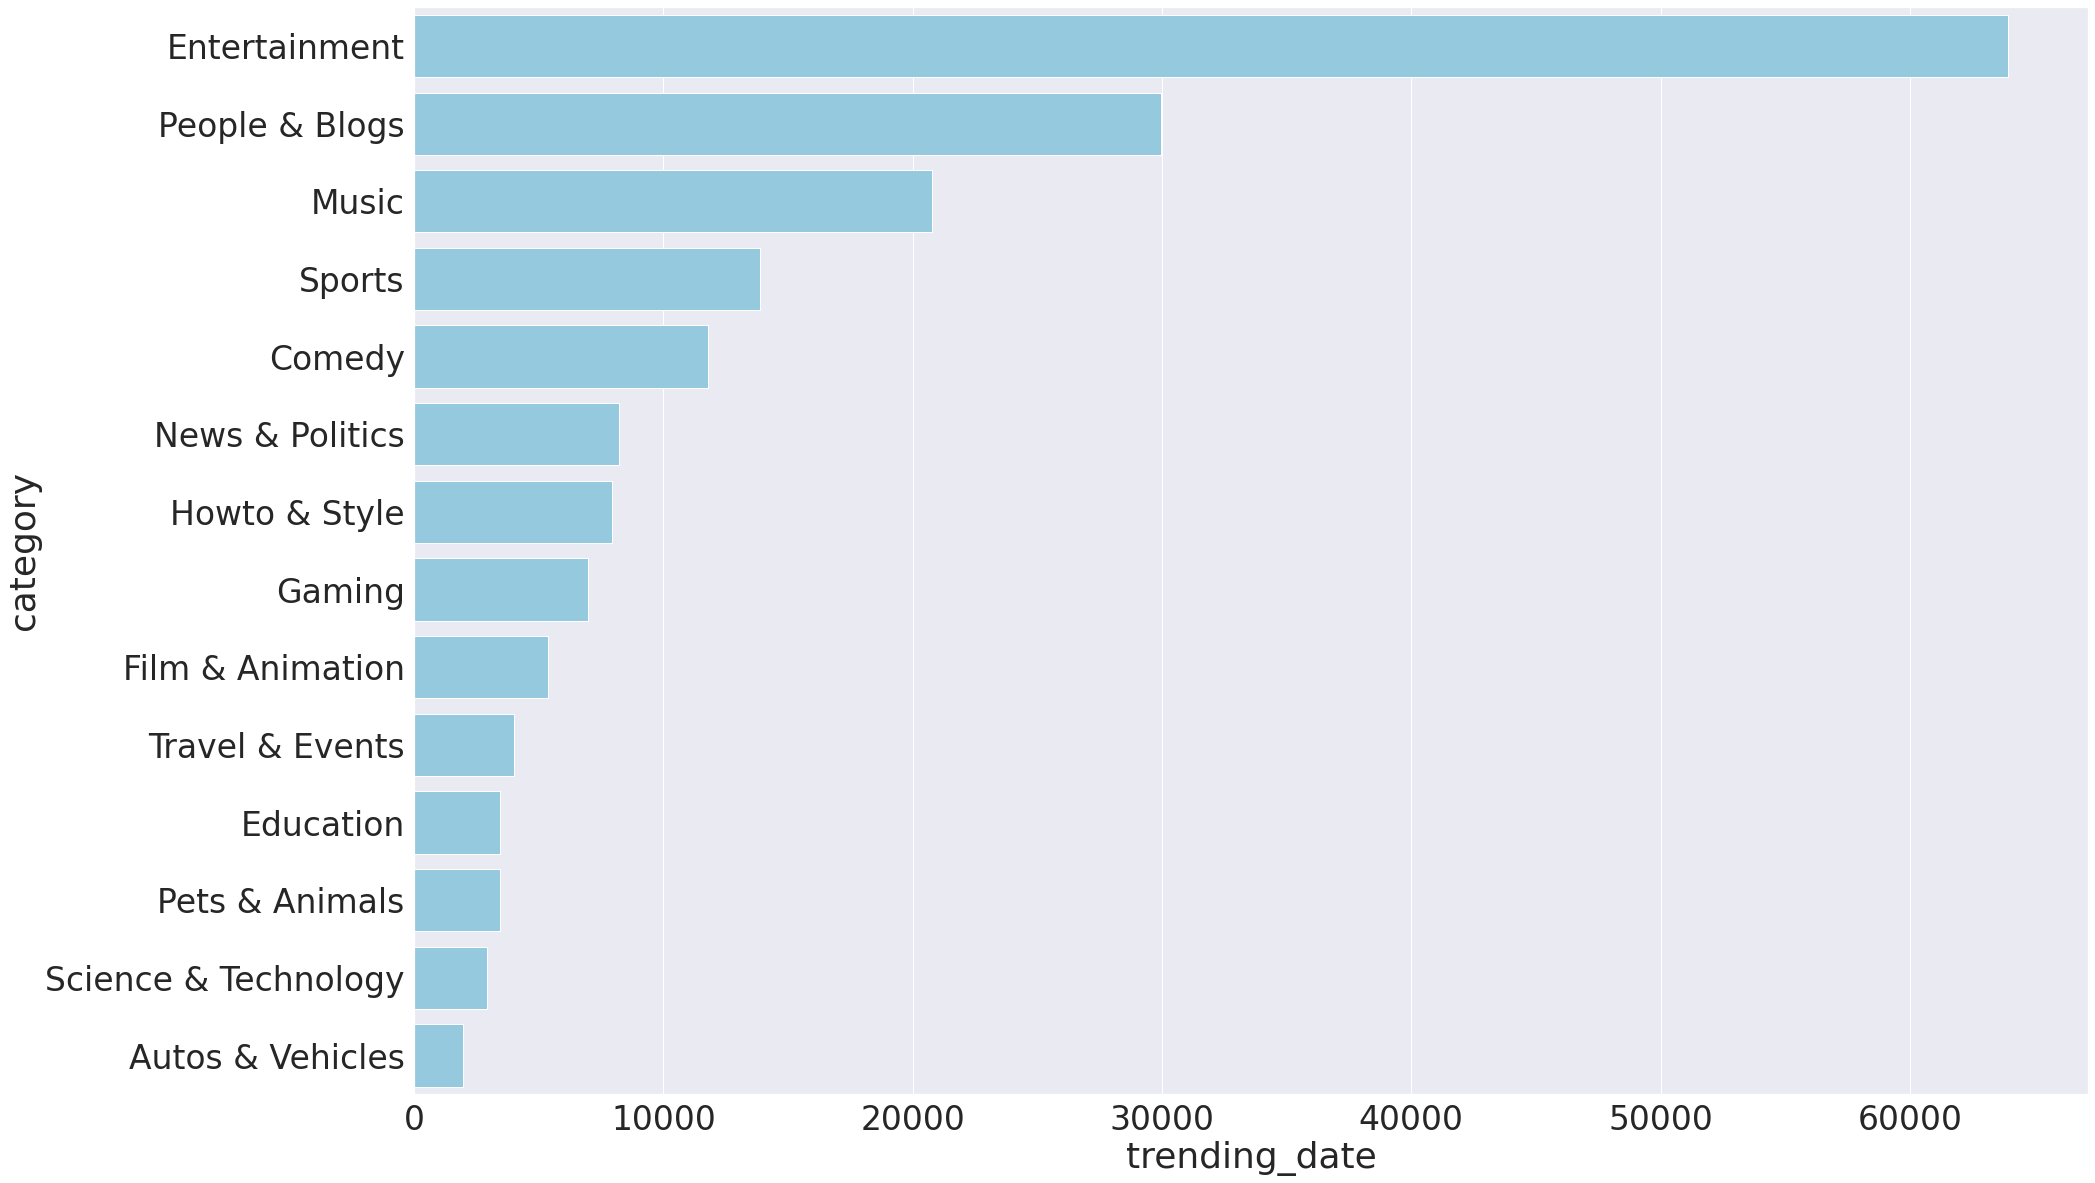

In [25]:
# 카테고리별 트렌딩 횟수 시각화
sns.set(font_scale=3)

fig = plt.figure(figsize=(30, 20))

sns.barplot(y = trending_count['category'],
            x = trending_count['trending_date'],
            color ='skyblue',
            orient = 'h'
            )

In [26]:
# 연-월로 trending_date정리

df['trending_date'] = pd.to_datetime(df['trending_date'])
df['published_at'] = pd.to_datetime(df['published_at'])
df[['trending_date', 'published_at']].dtypes

df['trending_month'] = df['trending_date'].dt.strftime('%y'+'.'+'%m')
df[['trending_date', 'trending_month']].tail()

,trending_date,trending_month
184860,2023-03-23 00:00:00+00:00,23.03
184861,2023-03-23 00:00:00+00:00,23.03
184862,2023-03-23 00:00:00+00:00,23.03
184863,2023-03-23 00:00:00+00:00,23.03
184864,2023-03-23 00:00:00+00:00,23.03


In [27]:
# nunique()로, 중복을 제거해 집계 

month_df = df.groupby(['trending_month', 'category'])[['title']].nunique().reset_index()
month_df.rename(columns={'title': 'count'}, inplace=True)

month_df.head()

,trending_month,category,count
0,20.08,Autos & Vehicles,10
1,20.08,Comedy,40
2,20.08,Education,25
3,20.08,Entertainment,222
4,20.08,Film & Animation,38


In [28]:
# pd.IndexSlice를 통한 8개월씩 슬라이싱
# month1 = month_df[0:224]
# month2 = month_df[224:448]

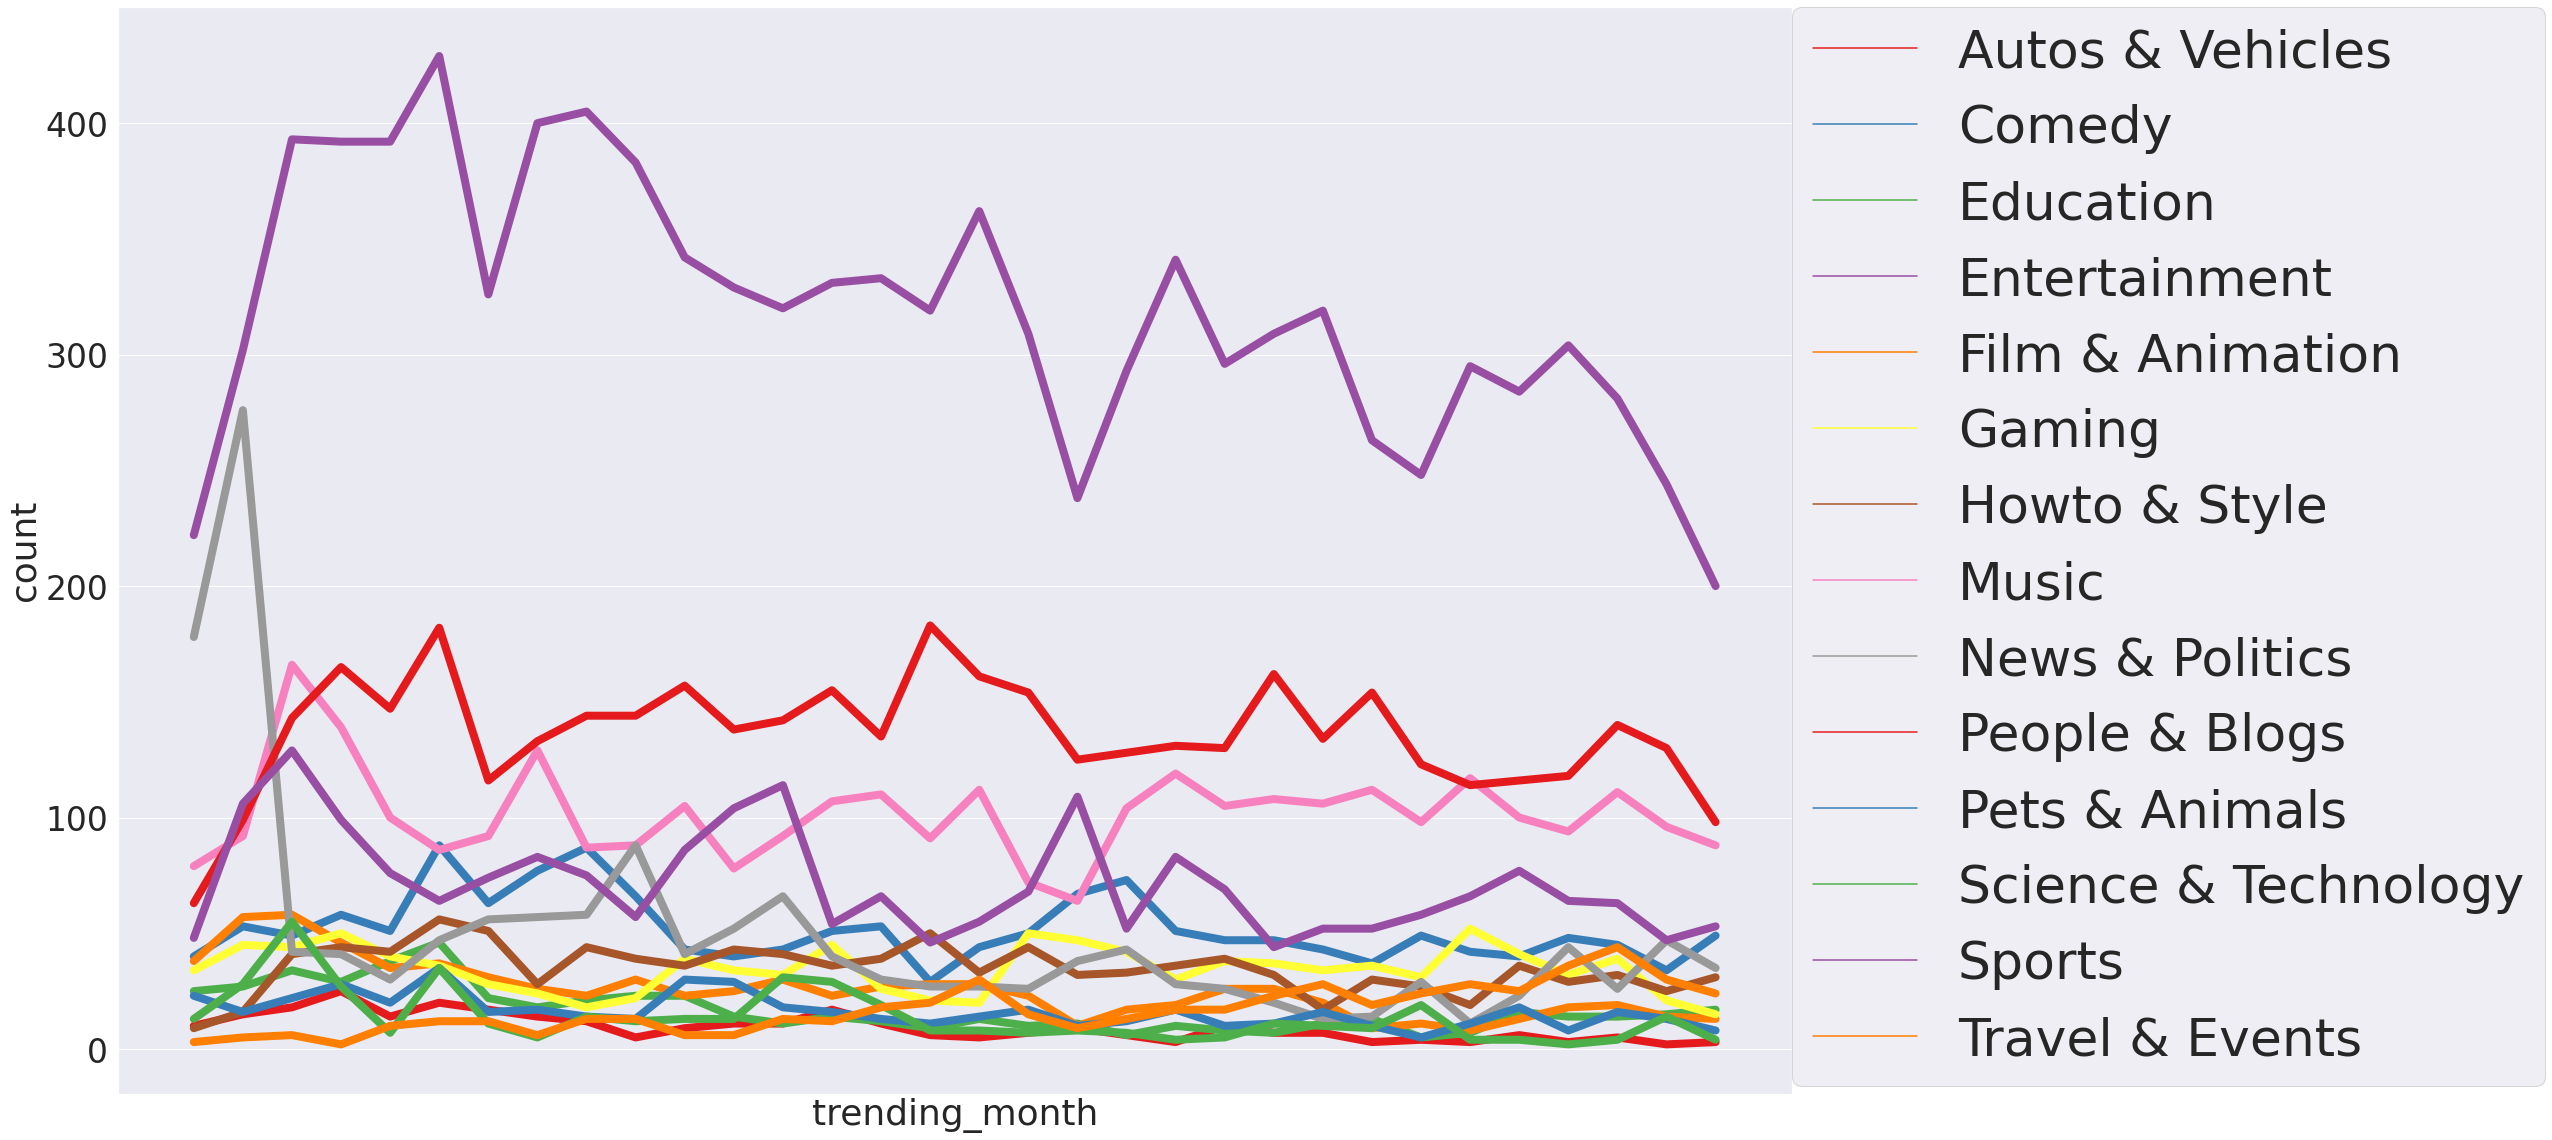

In [29]:
# 월별 카테고리 소비량 시각화
# 2020-08-12 ~ 2023-03-23까지의 데이터이기에 처음과 끝의 데이터는 수가 적음
sns.set(font_scale = 3)
fig = plt.figure(figsize = (30, 20))

sns.lineplot(data = month_df, 
             x = 'trending_month',
             y = 'count', 
             hue = 'category', 
             palette = 'Set1',
             linewidth = "8",
            )
plt.gca().xaxis.set_ticks([]) #x축 눈금만 없애기
plt.legend(bbox_to_anchor=(1.0, 1), borderaxespad=0, fontsize=52);

# 시각화 이미지 저장
plt.savefig('sample.png')

In [30]:
# 요일 (0:월요일, 6:일요일)
df['weekday'] = df['published_at'].dt.weekday

# 시간 (0 ~ 24)
df['hour'] = df['published_at'].dt.hour

df[['published_at', 'weekday', 'hour']].head()

,published_at,weekday,hour
0,2020-08-09 09:32:48+00:00,6,9
1,2020-08-12 09:00:08+00:00,2,9
2,2020-08-10 09:54:13+00:00,0,9
3,2020-08-11 15:00:58+00:00,1,15
4,2020-08-11 09:00:13+00:00,1,9


<AxesSubplot:xlabel='weekday', ylabel='count'>

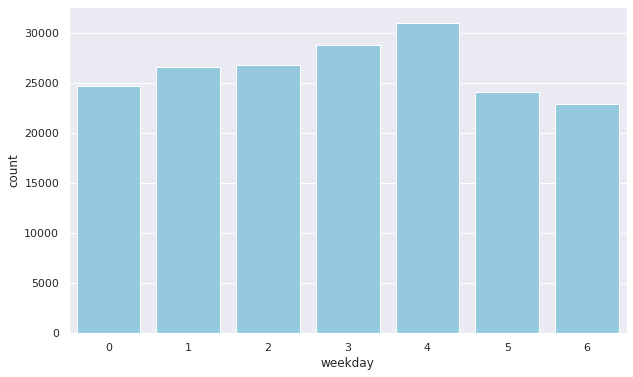

In [31]:
sns.set(font_scale = 1)
fig = plt.figure(figsize = (10, 6))

sns.countplot(data=df, x='weekday', color='skyblue')

<AxesSubplot:xlabel='hour', ylabel='count'>

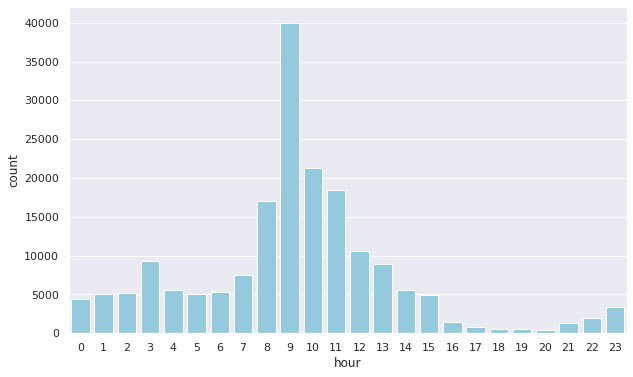

In [32]:
sns.set(font_scale = 1)
fig = plt.figure(figsize = (10, 6))

sns.countplot(data=df, x='hour', color='skyblue')

<AxesSubplot:xlabel='hour', ylabel='video_id'>

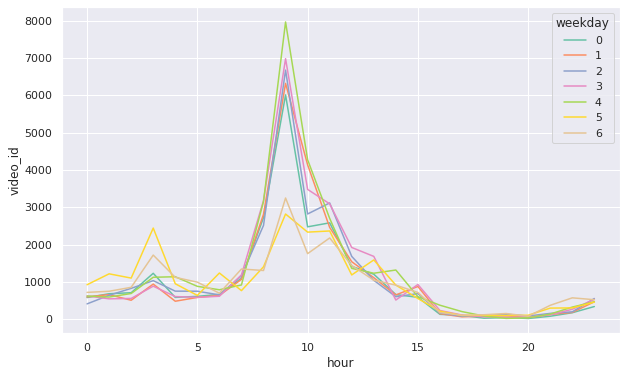

In [33]:
df2 = df.groupby(['hour', 'weekday'])[['video_id']].count().reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = df2, 
             x = 'hour',
             y = 'video_id',
             hue = 'weekday',
             palette = 'Set2',
           )

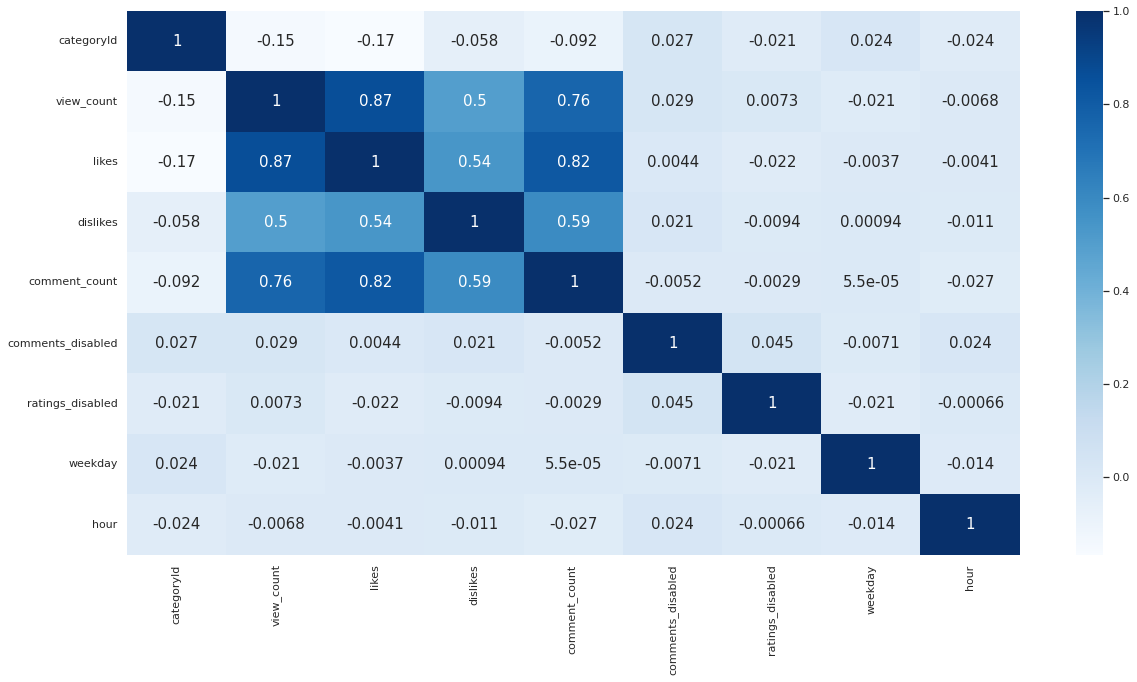

In [34]:
# views와 다른 변수와 상관관계

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),
           annot = True,
           annot_kws={'size' : 15},
           cmap = 'Blues')

plt.savefig('sample1.png')

In [35]:
# comment/rating_disabled 기능의 영향
# 중복된 데이터는 제거 함

In [36]:
comment_pct = len(df[df['comments_disabled']]) / len(df)*100
rating_pct = len(df[df['ratings_disabled']]) / len(df)*100

print('comment_disabled 비율 : %4.2f' %comment_pct)
print('rating_disabled 비율 : %4.2f' %rating_pct)

comment_disabled 비율 : 0.41
rating_disabled 비율 : 1.53


In [37]:
# 평균 view_count 비교 후, t-test 진행
comment_disabled = df['view_count'][df['comments_disabled']].mean()
comment_abled = df['view_count'][~df['comments_disabled']].mean()

rating_disabled = df['view_count'][df['ratings_disabled']].mean()
rating_abled = df['view_count'][~df['ratings_disabled']].mean()

print('-----평균 view_count-----')
print('comment_disabled : {:.0f}'.format(comment_disabled))
print('comment_abled : {:.0f}'.format(comment_abled))

print()
print('rating_disabled : {:.0f}'.format(rating_disabled))
print('rating_abled : {:.0f}'.format(rating_abled))

-----평균 view_count-----
comment_disabled : 4580762
comment_abled : 1689911

rating_disabled : 2072594
rating_abled : 1695890


In [39]:
from scipy import stats

comments_disabled = df[df['comments_disabled']]
comments_abled = df[~df['comments_disabled']]

# Levene의 등분산 검정 
lev_result = stats.levene(comments_disabled['view_count'], 
                          comments_abled['view_count'])
print('LeveneResult(F) : %.2f \np-value : %.3f' % (lev_result))

## p_value < 0.05이므로 equal_var = False로 진행

LeveneResult(F) : 143.10 
p-value : 0.000


In [40]:
t_result = stats.ttest_ind(comments_disabled['view_count'], 
                           comments_abled['view_count'], 
                           equal_var=False) 
print('t-stat : %.2f \np-value : %.3f' % (t_result))
      
## p_value < 0.01 이므로 평균 간에 차이가 없다는 귀무 가설 기각
## comment기능의 평균에 유의한 차이가 있음

t-stat : 9.66 
p-value : 0.000


In [41]:
ratings_disabled = df[df['ratings_disabled']]
ratings_abled = df[~df['ratings_disabled']]

# Levene의 등분산 검정
lev_result = stats.levene(ratings_disabled['view_count'],
                         ratings_abled['view_count'])
print('LeveneResult(F) : %.2f \np-value : %.3f' % (lev_result))

## p_value < 0.05이므로 equal_var = False로 진행

LeveneResult(F) : 13.51 
p-value : 0.000


In [42]:
t_result = stats.ttest_ind(ratings_disabled['view_count'], 
                           ratings_abled['view_count'], 
                           equal_var=False) 
print('t-stat : %.2f \np-value : %.3f' % (t_result))
      
## p_value < 0.01 이므로 평균 간에 차이가 없다는 귀무 가설 기각
## rating기능의 평균에 유의한 차이가 있음

t-stat : 3.24 
p-value : 0.001


In [43]:
# view_count 4분위 지정
q1, q2, q3 = df['view_count'].quantile([0.25, 0.5, 0.75])

def get_quart(view_count):
    if view_count < q1: quart = '1q'
    elif view_count < q2: quart = '2q'
    elif view_count < q3: quart = '3q'
    else: quart = '4q'
    return quart

df['view_quantile'] = df['view_count'].apply(lambda view_count: get_quart(view_count))
df[['view_count', 'view_quantile']].head()

,view_count,view_quantile
0,5947503,4q
1,963384,3q
2,2950885,4q
3,1743374,4q
4,3433885,4q


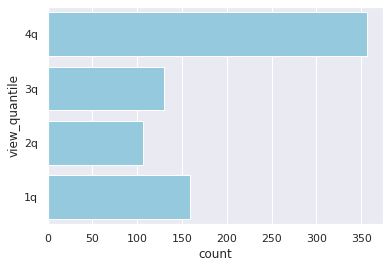

In [55]:
# comments_disabled 기능을 사용한 동영상의 수
sns.countplot(data = df[df['comments_disabled']], 
              y='view_quantile', 
              order=['4q', '3q', '2q', '1q'], 
              color='skyblue');
## 1, 2, 3사분위(하위 75%)합이 4분위(상위 25%)의 값과 비슷함

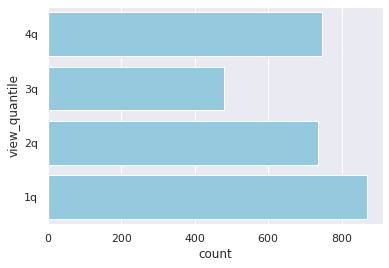

In [53]:
# rating_disabled 기능을 사용한 동영상의 수

sns.countplot(data = df[df['ratings_disabled']], 
              y='view_quantile', 
              order=['4q', '3q', '2q', '1q'], 
              color='skyblue');
## 1사분위의 값이 4분위의 값보다 많음
## rating_disabled 기능을 사용하지 않는 것이 높은 view를 기록할 수 있을 것 같음
